# This Notebook plots all precision-recall curves from experiment_results.csv

Each curve corresponds to a row in the CSV file, using columns results[0] to results[10].

In [41]:
# Import section
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [42]:
# Define recall axis (11 points, matching the results columns)
pre_defined_recall = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [43]:
# Read experiment_results.csv and extract precision-recall values
csv_path = os.path.join(os.getcwd(), 'experiment_results.csv')
df = pd.read_csv(csv_path)

# Extract all results columns
result_cols = [f'results[{i}]' for i in range(11)]
p_r_values = df[result_cols].to_numpy()
num_curves = p_r_values.shape[0]

print(f"Loaded {num_curves} precision-recall curves from CSV.")

Loaded 2160 precision-recall curves from CSV.


In [44]:
df.head()

# Calculate average precision-recall and add to the df
df['avg_precision'] = p_r_values.mean(axis=1)

# Sort the dataframe by average precision
df.sort_values(by='avg_precision', ascending=False, inplace=True)

df.head()

,_id,window_size,percent_overlap,window_type,scaling,mode,resample_method,target_sr,feature_type,gabor_nscales,...,results[2],results[3],results[4],results[5],results[6],results[7],results[8],results[9],results[10],avg_precision
356,682aefd583ccc46f95ceea65,1024,20,boxcar,density,magnitude,none,22050,gabor,3,...,0.849729,0.831989,0.817287,0.791060,0.773237,0.750137,0.711365,0.640244,0.510284,0.778154
497,682af0b983ccc46f95ceea71,1024,20,boxcar,spectrum,magnitude,none,22050,gabor,3,...,0.844868,0.830682,0.812939,0.790751,0.771759,0.749293,0.711970,0.644503,0.512495,0.777297
644,682af19e83ccc46f95ceea7d,1024,20,hann,density,magnitude,none,22050,gabor,3,...,0.866954,0.841819,0.815847,0.787358,0.763519,0.738651,0.685610,0.590949,0.494098,0.772709
789,682af28183ccc46f95ceea89,1024,20,hann,spectrum,magnitude,none,22050,gabor,3,...,0.866954,0.841466,0.815594,0.787062,0.763524,0.738268,0.684232,0.590136,0.494150,0.772398
1247,682af55102db8c6d23de93e0,512,20,blackman,density,magnitude,librosa,22050,gabor,3,...,0.843418,0.826119,0.807220,0.791836,0.772437,0.748319,0.712542,0.638464,0.470404,0.771905


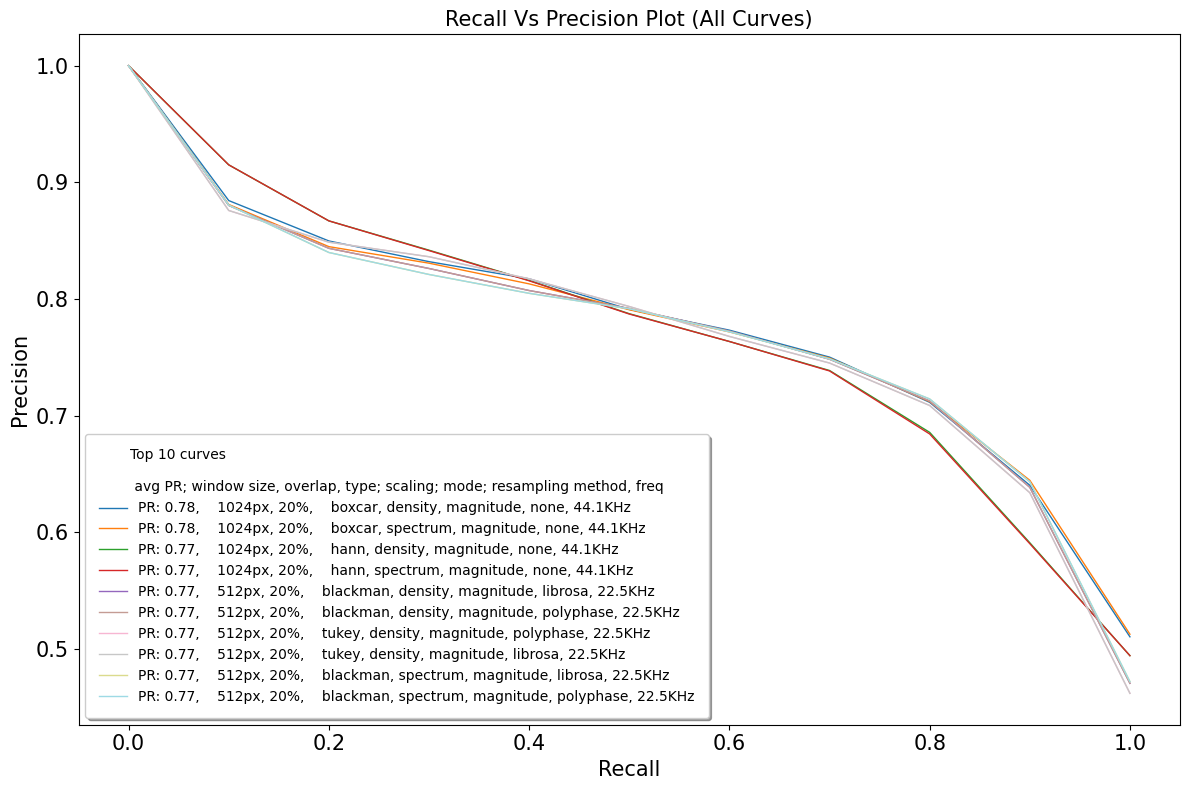

In [ ]:
# Plot all precision-recall curves.
fig = plt.figure(figsize=(12,8))
x = pre_defined_recall

p_r_values = df[result_cols].to_numpy()

N_CURVES = 10

# Use a colormap for many curves
cmap = plt.get_cmap('tab20', N_CURVES)

# Create a list of curve labels
# curve_labels = [f"Curve {i}" for i in range(num_curves)]
# Join values of the parameter columns into a single string for each curve
curve_labels = []
for i in range(num_curves):
    label = f"PR: {df.iloc[i]['avg_precision']:.2f}, {df.iloc[i]['window_size']}px, {df.iloc[i]['percent_overlap']}%, {df.iloc[i]['window_type']}, {df.iloc[i]['scaling']}, {df.iloc[i]['mode']}, {df.iloc[i]['resample_method']}"
    if df.iloc[i]['resample_method'] != 'none':
        label += f", 22.5KHz"
    else:
        label += f", 44.1KHz"
    curve_labels.append(label)

for i in range(N_CURVES):
    y = p_r_values[i]
    label = curve_labels[i]   # Only label first 10 for legend readability
    plt.plot(x, y, color=cmap(i), linewidth=1, label=label)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=10, ncol=1, loc='lower left', title='Top 10 curves \n\n avg PR; window size, overlap, type; scaling; mode; resampling method, freq')
plt.title("Recall Vs Precision Plot (All Curves)", fontsize=15)
plt.xlabel("Recall", fontsize=15)
plt.ylabel("Precision", fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(), "precision_vs_recall_all.png"))
plt.show()

# Print dataframe with average precision and parameter columns




# Save the sorted dataframe to a new CSV file

In [46]:


# Replace 'target_sr' values with 44.1KHz if 'resample_method' is 'none' or 22.5KHz otherwise
df['target_sr'] = np.where(df['resample_method'] == 'none', '44.1KHz', '22.5KHz')

columns = ['avg_precision', 
           'window_size', 
           'percent_overlap', 
           'window_type', 
           'scaling', 
           'mode', 
           'resample_method', 
           'target_sr',
           ]

df[columns]

,avg_precision,window_size,percent_overlap,window_type,scaling,mode,resample_method,target_sr
356,0.778154,1024,20,boxcar,density,magnitude,none,44.1KHz
497,0.777297,1024,20,boxcar,spectrum,magnitude,none,44.1KHz
644,0.772709,1024,20,hann,density,magnitude,none,44.1KHz
789,0.772398,1024,20,hann,spectrum,magnitude,none,44.1KHz
1247,0.771905,512,20,blackman,density,magnitude,librosa,22.5KHz
...,...,...,...,...,...,...,...,...
1405,0.501795,2048,40,blackman,density,psd,polyphase,22.5KHz
1699,0.496462,2048,40,blackmanharris,density,psd,polyphase,22.5KHz
1679,0.496462,2048,40,blackmanharris,density,psd,librosa,22.5KHz
419,0.490537,2048,40,boxcar,density,psd,librosa,22.5KHz
